In [38]:
import numpy as np
import mne
import scipy.io
import matplotlib.pyplot as plt
import pylab

%matplotlib inline

mne.set_log_level('WARNING')

## Set Parameters

In [39]:
freq_s = 250    # [Hz] Sampling Frequency
trial_len = 4    # [sec] Length of a single trial
n_channels = 3    # set numpy of channels to use from raw eeg matrix
alpha_range = [8, 14]    # [Hz] range of alpha frequency
alpha_subbands_frq = np.array([np.arange(8,13),np.arange(10,15)]).T.astype(float)    # Sub bands of alpha
print('Alpha frequency range: {}\nAlpha sub bands:\n{}'.format(alpha_range, alpha_subbands_frq))

Alpha frequency range: [8, 14]
Alpha sub bands:
[[  8.  10.]
 [  9.  11.]
 [ 10.  12.]
 [ 11.  13.]
 [ 12.  14.]]


## Read raw eeg data

In [40]:
# Load Raw EEG
raw_fname = '/Users/leonardrychly/Dropbox/[TUM]/4. WiSe 1617/Masterarbeit/Code/eeg_feature_extraction/exp_1-raw.fif'
raw = mne.io.read_raw_fif(raw_fname, add_eeg_ref=False).load_data()

# Remove EOG channels (channels 4-6)
raw.drop_channels(['eog_4','eog_5', 'eog_6'])

<Raw  |  exp_1-raw.fif, n_channels x n_times : 3 x 552452 (2209.8 sec), ~12.7 MB, data loaded>

## Remove trials with artifacts from 'trials' and 'y' corresponding to the raw eeg data

In [41]:
# Load data containing artifacts
data_path = "/Users/leonardrychly/Dropbox/[TUM]/4. WiSe 1617/Masterarbeit/Code/eeg_feature_extraction/B01T.mat"
mat = scipy.io.loadmat(data_path)['data']

# Get artifacts
exp_arr = mat[0,0]
# explanation:   exp_arr[0][0][data]
exp_dict = {'X': exp_arr[0][0][0].T,
            'trial': exp_arr[0][0][1],
            'y': exp_arr[0][0][2],
            'fs': exp_arr[0][0][3].flatten(),
             'classes': exp_arr[0][0][4].flatten(),
             'artifacts': exp_arr[0][0][5],
             'gender': exp_arr[0][0][6],
             'age': exp_arr[0][0][7].flatten()
             }

# Remove from 'trials' and 'y'
artifact_idx = exp_dict['artifacts'].nonzero()[0]
exp_dict['trial'] = np.delete(exp_dict['trial'], artifact_idx)
exp_dict['y'] = np.delete(exp_dict['y'], artifact_idx)

## Plot  part of  EEG raw

In [42]:
# Plot window
start = exp_dict['trial'][0]
stop = start + (trial_len * freq_s)

# Calulate start and stop time from start/stop sample index 
t_start = start / freq_s
t_stop = (start + (trial_len * freq_s)) / freq_s

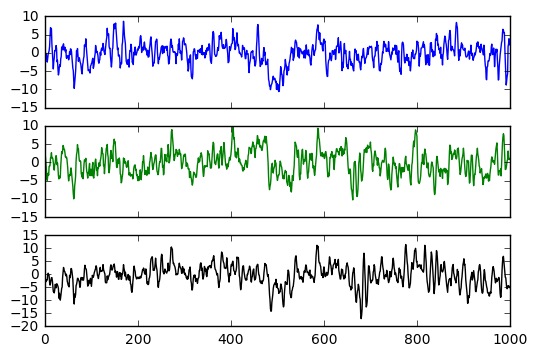

In [43]:
# Plot a segment of raw data
raw_segment, times = raw[:, start:stop]

f, (ax0, ax1, ax2) = plt.subplots(3, sharex=True)
ax0.plot(np.arange(len(raw_segment[0])), raw_segment[0], c='blue')
ax1.plot(np.arange(len(raw_segment[1])), raw_segment[1], c='green')
ax2.plot(np.arange(len(raw_segment[2])), raw_segment[2], c='black')

## Filter alpha band

In [44]:
raw_temp = raw.copy()    #  make copy of raw to band pass filter and keep original

raw_alpha = raw_temp.filter(l_freq=alpha_range[0], h_freq=alpha_range[1], 
                       filter_length='auto', l_trans_bandwidth='auto', 
                       h_trans_bandwidth='auto', n_jobs=1, method='fir', 
                       iir_params=None, phase='zero', fir_window='hamming')

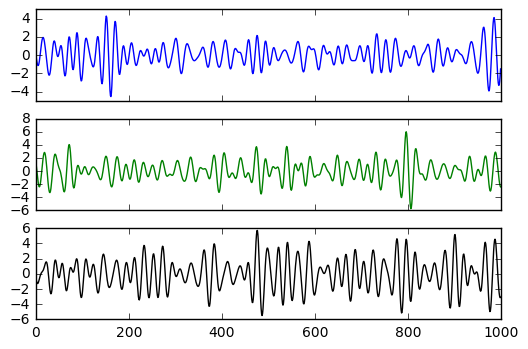

In [45]:
# Plot
raw_segment, times = raw_alpha[:, start:stop]

f, (ax0, ax1, ax2) = plt.subplots(3, sharex=True)
ax0.plot(np.arange(len(raw_segment[0])), raw_segment[0], c='blue')
ax1.plot(np.arange(len(raw_segment[1])), raw_segment[1], c='green')
ax2.plot(np.arange(len(raw_segment[2])), raw_segment[2], c='black')

## Filter into subbands

#### Filter RAW

In [80]:
raw_alpha_sub_list = [[] for _ in range(len(alpha_subbands_frq))]
for sb_idx, subband in enumerate(alpha_subbands_frq):
    raw_temp = raw_alpha.copy()
    raw_alpha_sub_list[sb_idx] = raw_temp.filter(l_freq=subband[0], h_freq=subband[1], 
                                                        filter_length='auto', l_trans_bandwidth='auto', 
                                                        h_trans_bandwidth='auto', n_jobs=1, method='fir', 
                                                        iir_params=None, phase='zero', fir_window='hamming')

In [81]:
# Plot
raw_sub_segment_0, times = raw_alpha_sub_list[0][:, start:stop]
raw_sub_segment_1, times = raw_alpha_sub_list[1][:, start:stop]
raw_sub_segment_2, times = raw_alpha_sub_list[2][:, start:stop]
raw_sub_segment_3, times = raw_alpha_sub_list[3][:, start:stop]
raw_sub_segment_4, times = raw_alpha_sub_list[4][:, start:stop]

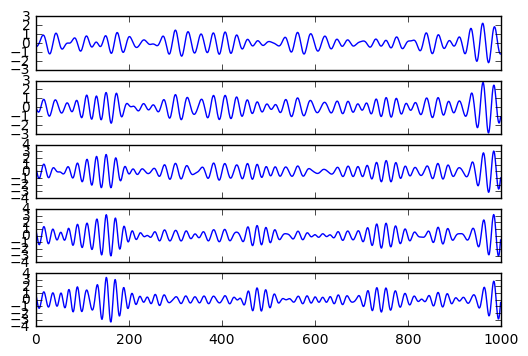

In [91]:
# Sub bands of channel 1
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, sharex=True)
ax0.plot(np.arange(len(raw_sub_segment_0[0])), raw_sub_segment_0[0], c='blue')
ax1.plot(np.arange(len(raw_sub_segment_1[0])), raw_sub_segment_1[0], c='blue')
ax2.plot(np.arange(len(raw_sub_segment_2[0])), raw_sub_segment_2[0], c='blue')
ax3.plot(np.arange(len(raw_sub_segment_3[0])), raw_sub_segment_3[0], c='blue')
ax4.plot(np.arange(len(raw_sub_segment_4[0])), raw_sub_segment_4[0], c='blue')

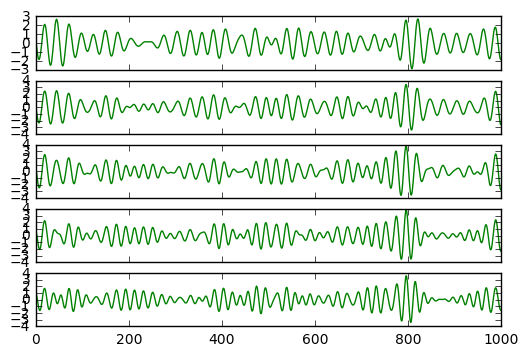

In [84]:
# Sub bands of channel 2
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, sharex=True)
ax0.plot(np.arange(len(raw_sub_segment_0[1])), raw_sub_segment_0[1], c='green')
ax1.plot(np.arange(len(raw_sub_segment_1[1])), raw_sub_segment_1[1], c='green')
ax2.plot(np.arange(len(raw_sub_segment_2[1])), raw_sub_segment_2[1], c='green')
ax3.plot(np.arange(len(raw_sub_segment_3[1])), raw_sub_segment_3[1], c='green')
ax4.plot(np.arange(len(raw_sub_segment_4[1])), raw_sub_segment_4[1], c='green')

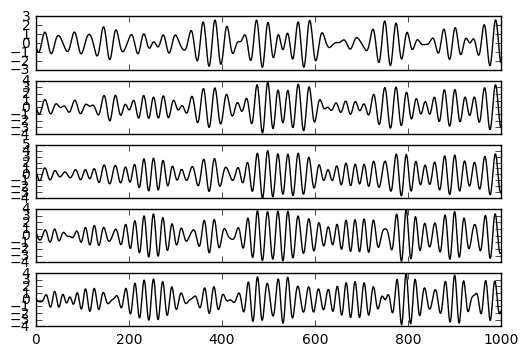

In [92]:
# Sub bands of channel 3
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, sharex=True)
ax0.plot(np.arange(len(raw_sub_segment_0[2])), raw_sub_segment_0[2], c='black')
ax1.plot(np.arange(len(raw_sub_segment_1[2])), raw_sub_segment_1[2], c='black')
ax2.plot(np.arange(len(raw_sub_segment_2[2])), raw_sub_segment_2[2], c='black')
ax3.plot(np.arange(len(raw_sub_segment_3[2])), raw_sub_segment_3[2], c='black')
ax4.plot(np.arange(len(raw_sub_segment_4[2])), raw_sub_segment_4[2], c='black')

## Calculate Power Spectral Density

In [161]:
# Set time range to clacualte PSD
print('t_start:' , t_start)
print('t_stop:', t_stop)

t_start: 220.56
t_stop: 224.56


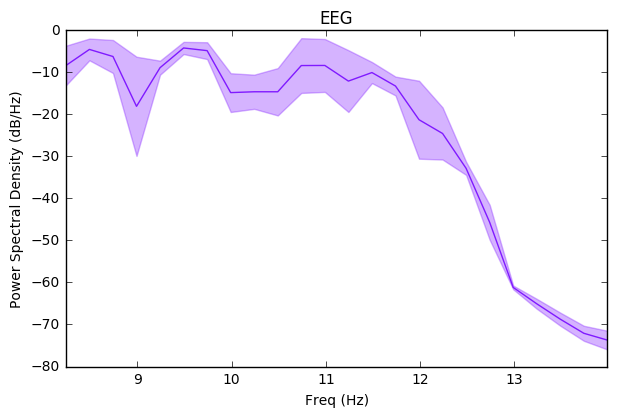

In [162]:
# PSD: Alpha sub band 1 (8-10Hz)
p = raw_alpha_sub_list[0].plot_psd(tmin=t_start, tmax=t_stop, 
                                   fmin=alpha_range[0], fmax=alpha_range[1], 
                                   color=(0.5, 0.1, 1))

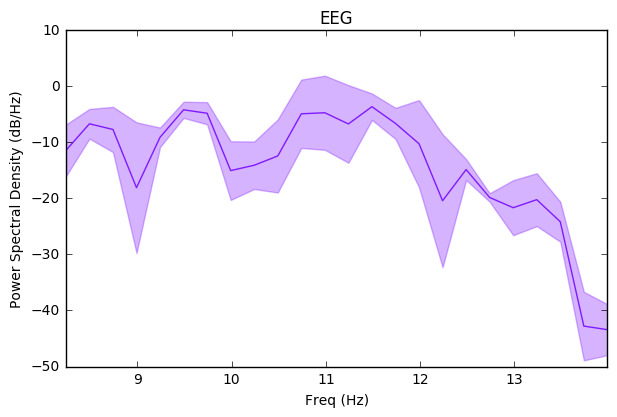

In [163]:
# PSD: Alpha sub band 2 (9-11Hz)
p = raw_alpha_sub_list[1].plot_psd(tmin=t_start, tmax=t_stop, 
                                   fmin=alpha_range[0], fmax=alpha_range[1], 
                                   color=(0.5, 0.1, 1))

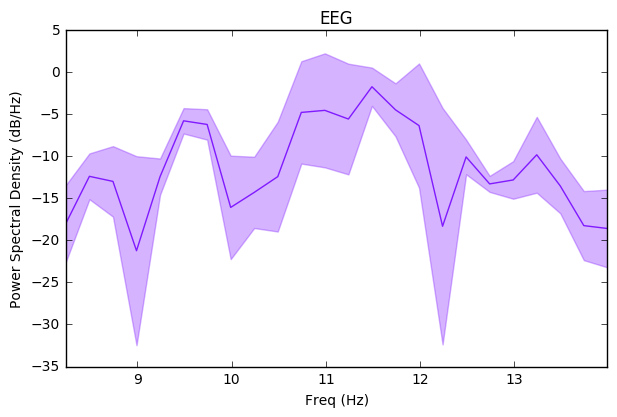

In [164]:
# PSD: Alpha sub band 3 (10-12Hz)
p = raw_alpha_sub_list[2].plot_psd(tmin=t_start, tmax=t_stop, 
                                   fmin=alpha_range[0], fmax=alpha_range[1], 
                                   color=(0.5, 0.1, 1))

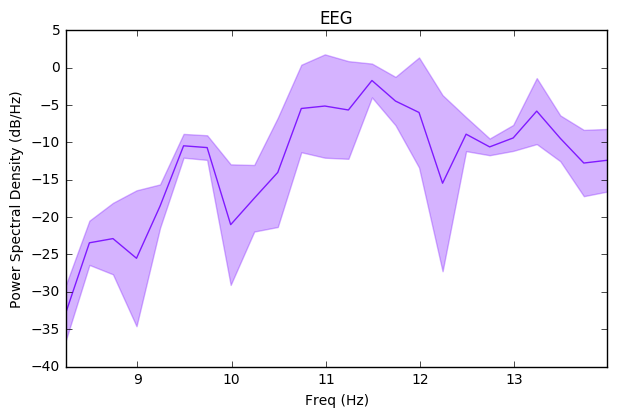

In [165]:
# PSD: Alpha sub band 4 (11-13Hz)
p = raw_alpha_sub_list[3].plot_psd(tmin=t_start, tmax=t_stop, 
                                   fmin=alpha_range[0], fmax=alpha_range[1], 
                                   color=(0.5, 0.1, 1))

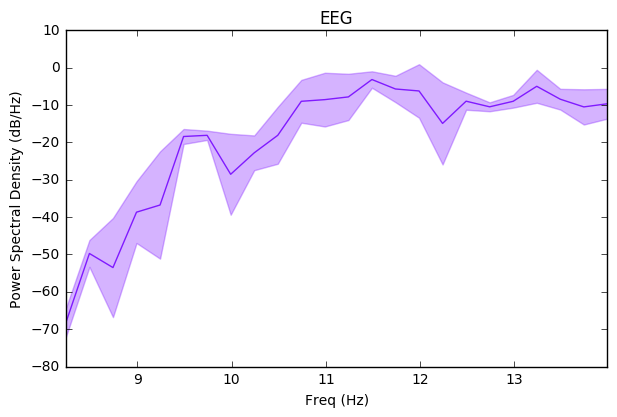

In [166]:
# PSD: Alpha sub band 5 (12-14Hz)
p = raw_alpha_sub_list[4].plot_psd(tmin=t_start, tmax=t_stop, 
                                   fmin=alpha_range[0], fmax=alpha_range[1], 
                                   color=(0.5, 0.1, 1))

## Calulate Power